# Modelling the Modulation Properties

In [1]:
import numpy as np
import plot_tools as pt
import matplotlib.pylab as plt
from src.Modulation import *

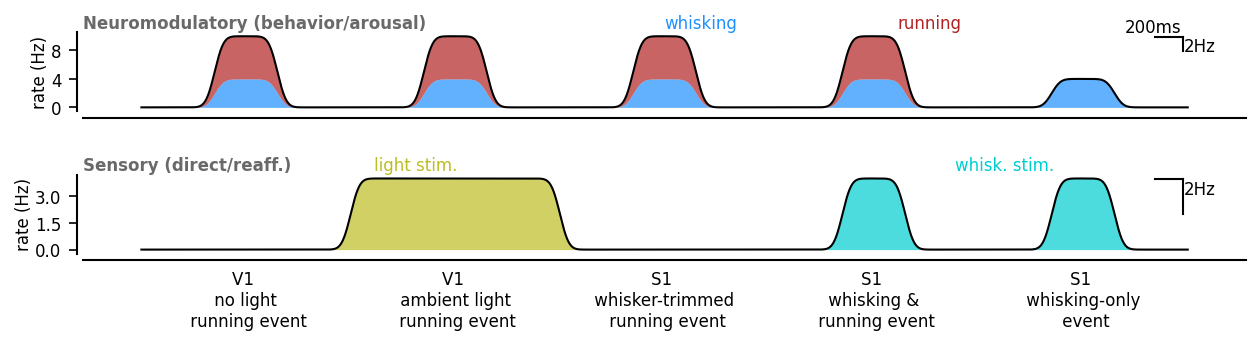

In [2]:
import matplotlib.pylab as plt
fig, AX = plt.subplots(2, 1, figsize=(10,2.5))
plt.subplots_adjust(bottom=.4, top=.99, hspace=.8)
t, Neuromodulatory, Sensory = build_arrays(Events, AX=AX)
AX[0].plot(t, Neuromodulatory, 'k-')
AX[1].plot(t, Sensory, 'k-')
pt.draw_bar_scales(AX[0], loc='top-right',
                   Xbar=200, Xbar_label='200ms', Ybar=2, Ybar_label='2Hz')
pt.draw_bar_scales(AX[1], loc='top-right',
                   Xbar=200, Ybar=2, Ybar_label='2Hz')
for ax, label in zip(AX, ['Neuromodulatory (behavior/arousal)', 'Sensory (direct/reaff.)']):
    pt.annotate(ax, label, (0,1), bold=True, color='dimgrey')
    pt.set_plot(ax, ylabel='rate (Hz)', xticks=[])
pt.annotate(AX[0], Types[0]['name'], (0.5, 1), color=Types[0]['color'])
pt.annotate(AX[0], Types[1]['name'], (0.7, 1), color=Types[1]['color'])
pt.annotate(AX[1], Types[2]['name'], (0.75, 1), color=Types[2]['color'])
pt.annotate(AX[1], Types[3]['name'], (0.25, 1), color=Types[3]['color'])

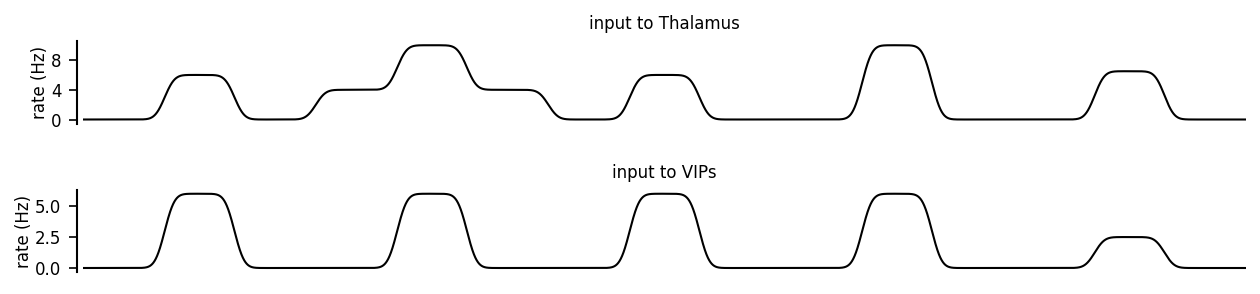

In [4]:
fig, AX = plt.subplots(2, 1, figsize=(10,2))
plt.subplots_adjust(hspace=0.8)
AX[0].plot(t, Neuromodulatory+Sensory, 'k-')
AX[1].plot(t, Neuromodulatory, 'k-')

for ax, label in zip(AX, ['input to Thalamus', 
                          'input to VIPs']):
    #ax.annotate(label, (0,0.5), ha='right', va='center')
    pt.set_plot(ax, ['left'], xlim=[t[0],t[-1]], ylabel='rate (Hz)', title=label)
